In [1]:
import csv
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

In [3]:
NUM_CLASSES = 4

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
RANDOM_SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            44 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,114 (4.35 KB)

 Trainable params: 1,114 (4.35 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.3125 - loss: 1.4066
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3089 - loss: 1.4131 - val_accuracy: 0.3601 - val_loss: 1.3671
Epoch 2/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3047 - loss: 1.3791
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3199 - loss: 1.3746 - val_accuracy: 0.4550 - val_loss: 1.3500
Epoch 3/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3594 - loss: 1.3669
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3552 - loss: 1.3580 - val_accuracy: 0.4795 - val_loss: 1.3268
Epoch 4/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3750 - loss: 1.3527
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9815 - loss: 0.1815


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
[1.3935464e-06 9.9999714e-01 7.4468909e-07 6.5897319e-07]
1


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


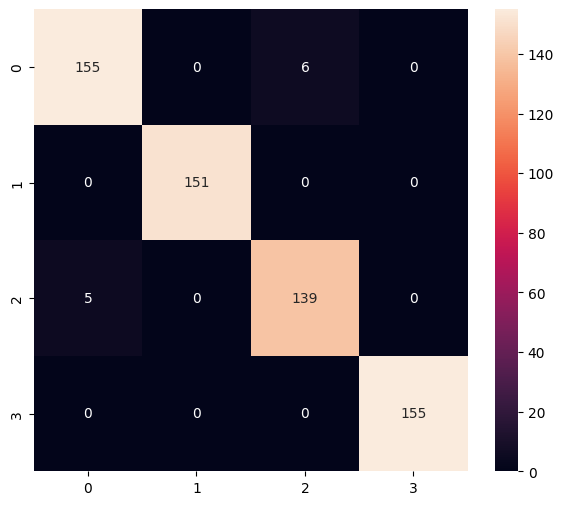

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       161
           1       1.00      1.00      1.00       151
           2       0.96      0.97      0.96       144
           3       1.00      1.00      1.00       155

    accuracy                           0.98       611
   macro avg       0.98      0.98      0.98       611
weighted avg       0.98      0.98      0.98       611



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [16]:

# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\lohit\AppData\Local\Temp\tmpojmrvvrx\assets


INFO:tensorflow:Assets written to: C:\Users\lohit\AppData\Local\Temp\tmpojmrvvrx\assets


Saved artifact at 'C:\Users\lohit\AppData\Local\Temp\tmpojmrvvrx'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  1652439549520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1652439550672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1652439553360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1652439563536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1652439563920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1652439555472: TensorSpec(shape=(), dtype=tf.resource, name=None)


6556